In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_train = pd.read_csv("../input/credit-train/credit_train.csv" , sep = ",")
df_train.head()

Loan ID                           Customer ID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011   
4  d4062e70-befa-4995-8643-a0de73938182  81536ad9-5ccf-4eb8-befb-47a4d608658e   

  Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
0  Fully Paid             445412.0  Short Term         709.0      1167493.0   
1  Fully Paid             262328.0  Short Term           NaN            NaN   
2  Fully Paid           99999999.0  Short Term         741.0      2231892.0   
3  Fully Paid             347666.0   Long Term         721.0       806949.0   
4  Fully Paid             176220.0  Short Term           NaN            NaN   

  Years in current job Home Ownership             Purpose  Monthly Debt  \
0              8 years  Home Mortgage   Home Improvements       5214.74   
1            10+ years  Home Mortgage  Debt Consolidation      33295.98   
2              8 years       Own Home  Debt Consolidation      29200.53   
3              3 years       Own Home  Debt Consolidation       8741.90   
4              5 years           Rent  Debt Consolidation      20639.70   

   Years of Credit History  Months since last delinquent  \
0                     17.2                           NaN   
1                     21.1                           8.0   
2                     14.9                          29.0   
3                     12.0                           NaN   
4                      6.1                           NaN   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                      6.0                        1.0                228190.0   
1                     35.0                        0.0                229976.0   
2                     18.0                        1.0                297996.0   
3                      9.0                        0.0                256329.0   
4                     15.0                        0.0                253460.0   

   Maximum Open Credit  Bankruptcies  Tax Liens  
0             416746.0           1.0        0.0  
1             850784.0           0.0        0.0  
2             750090.0           0.0        0.0  
3             386958.0           0.0        0.0  
4             427174.0           0.0        0.0

In [3]:
df_train.shape

(100514, 19)

## EDA (Exploratory Data Analysis)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [5]:
df_train.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [6]:
df_train.duplicated().sum()

10728

<Axes: xlabel='Loan Status', ylabel='Density'>

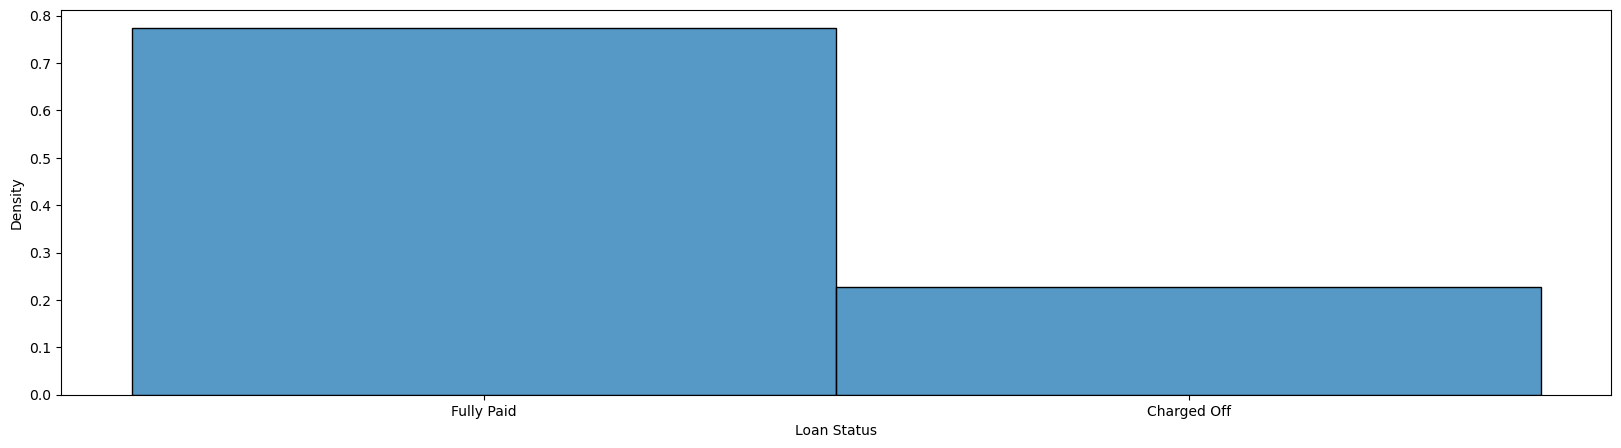

In [7]:
plt.figure(figsize=(20, 5))
sns.histplot(df_train['Loan Status'],label='with duplicate data',stat='density')

In [8]:
df_train= df_train.drop_duplicates()

<Axes: xlabel='Loan Status', ylabel='Density'>

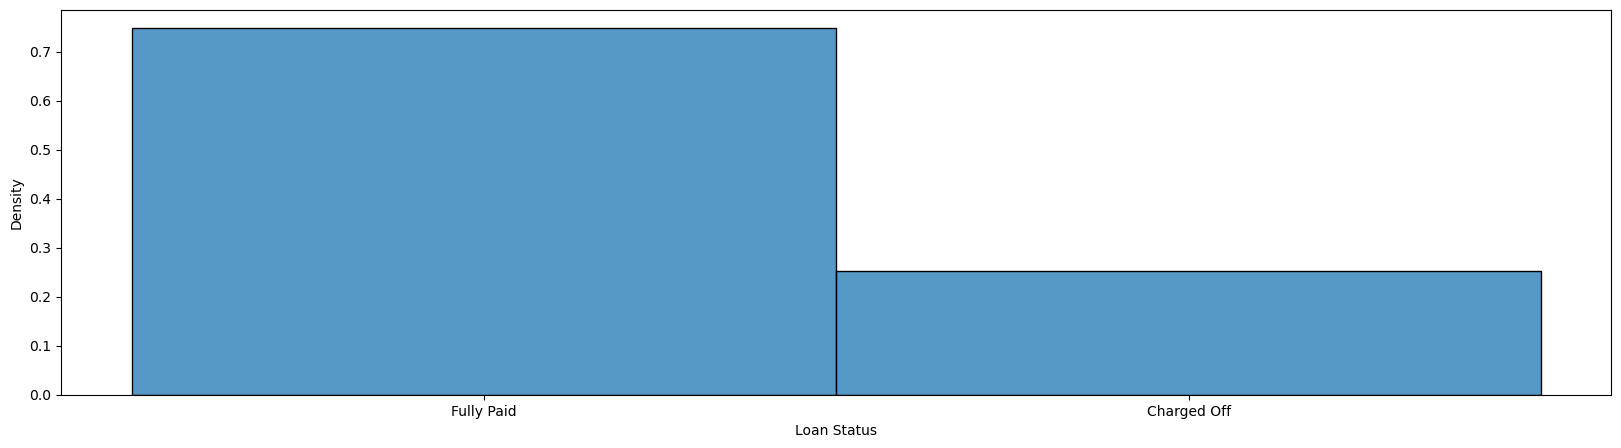

In [9]:
plt.figure(figsize=(20, 5))
sns.histplot(df_train['Loan Status'],label='without duplicate data',stat='density')

In [10]:
df_categorical= df_train.select_dtypes(include='object')
df_categorical.nunique()

Loan ID                 81999
Customer ID             81999
Loan Status                 2
Term                        2
Years in current job       11
Home Ownership              4
Purpose                    16
dtype: int64

**Handling Missing Values**

In [11]:
df_train.isnull().sum()/df_train.shape[0]*100

Loan ID                          0.001114
Customer ID                      0.001114
Loan Status                      0.001114
Current Loan Amount              0.001114
Term                             0.001114
Credit Score                    21.334061
Annual Income                   21.334061
Years in current job             4.235627
Home Ownership                   0.001114
Purpose                          0.001114
Monthly Debt                     0.001114
Years of Credit History          0.001114
Months since last delinquent    53.836901
Number of Open Accounts          0.001114
Number of Credit Problems        0.001114
Current Credit Balance           0.001114
Maximum Open Credit              0.003341
Bankruptcies                     0.212728
Tax Liens                        0.011138
dtype: float64

**Dropping all null values that are smaller thab 4%**

In [12]:
toBeDropped = []

for column in df_train.columns:
    if (df_train[column].isnull().sum() / df_train.shape[0] * 100) < 4:
        toBeDropped.append(column)
toBeDropped

['Loan ID',
 'Customer ID',
 'Loan Status',
 'Current Loan Amount',
 'Term',
 'Home Ownership',
 'Purpose',
 'Monthly Debt',
 'Years of Credit History',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Bankruptcies',
 'Tax Liens']

In [13]:
df_train= df_train.dropna(subset= toBeDropped)

In [14]:
df_train.isnull().sum()/df_train.shape[0]*100

Loan ID                          0.000000
Customer ID                      0.000000
Loan Status                      0.000000
Current Loan Amount              0.000000
Term                             0.000000
Credit Score                    21.330908
Annual Income                   21.330908
Years in current job             4.243635
Home Ownership                   0.000000
Purpose                          0.000000
Monthly Debt                     0.000000
Years of Credit History          0.000000
Months since last delinquent    53.950643
Number of Open Accounts          0.000000
Number of Credit Problems        0.000000
Current Credit Balance           0.000000
Maximum Open Credit              0.000000
Bankruptcies                     0.000000
Tax Liens                        0.000000
dtype: float64

<Axes: >

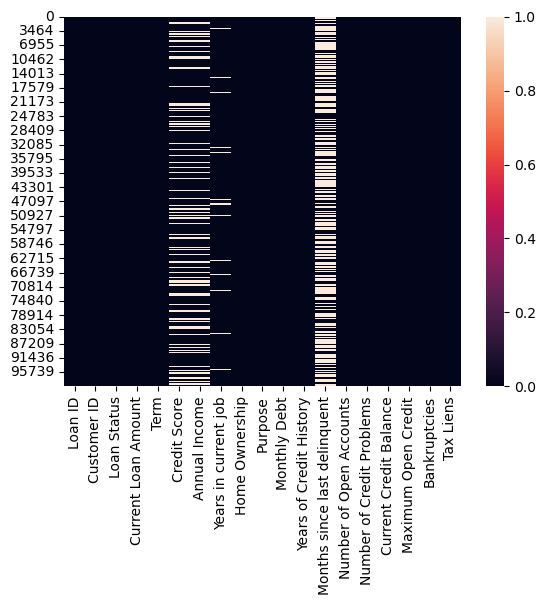

In [15]:
sns.heatmap(df_train.isnull())

In [16]:
df_train['Years in current job']

0          8 years
1        10+ years
2          8 years
3          3 years
4          5 years
           ...    
99994       1 year
99996       1 year
99997      6 years
99998      9 years
99999          NaN
Name: Years in current job, Length: 89593, dtype: object

<Axes: xlabel='Years in current job', ylabel='Density'>

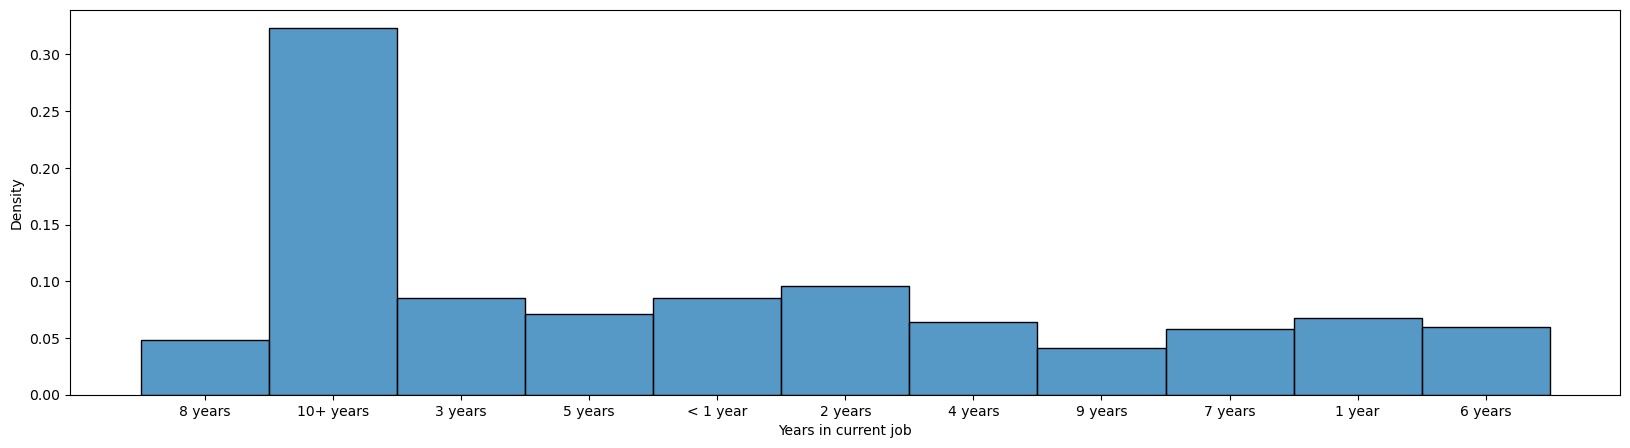

In [17]:
plt.figure(figsize=(20, 5))
sns.histplot(df_train['Years in current job'],label='without duplicate data',stat='density')

In [18]:
df_train['Years in current job']= df_train['Years in current job'].fillna(method='ffill')

<Axes: xlabel='Years in current job', ylabel='Density'>

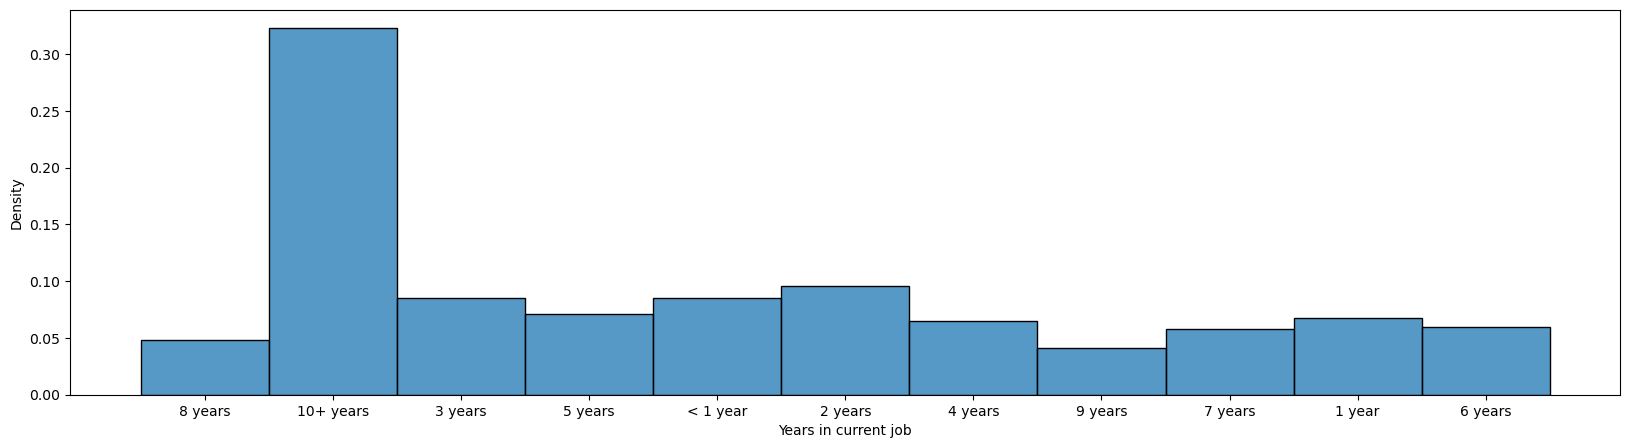

In [19]:
plt.figure(figsize=(20, 5))
sns.histplot(df_train['Years in current job'],label='without duplicate data',stat='density')

In [20]:
df_train.isnull().sum()/df_train.shape[0]*100

Loan ID                          0.000000
Customer ID                      0.000000
Loan Status                      0.000000
Current Loan Amount              0.000000
Term                             0.000000
Credit Score                    21.330908
Annual Income                   21.330908
Years in current job             0.000000
Home Ownership                   0.000000
Purpose                          0.000000
Monthly Debt                     0.000000
Years of Credit History          0.000000
Months since last delinquent    53.950643
Number of Open Accounts          0.000000
Number of Credit Problems        0.000000
Current Credit Balance           0.000000
Maximum Open Credit              0.000000
Bankruptcies                     0.000000
Tax Liens                        0.000000
dtype: float64

In [21]:
import plotly.express as px

px.box(df_train, y="Credit Score", color = 'Loan Status')

Credit Score    Axes(0.125,0.712609;0.168478x0.167391)
dtype: object

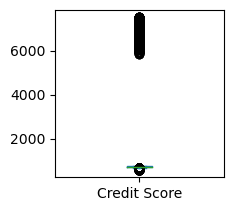

In [22]:
df_train['Credit Score'].plot(kind = "box" , subplots = True , figsize = (10,10) , layout = (4,4))

<Axes: xlabel='Credit Score', ylabel='Density'>

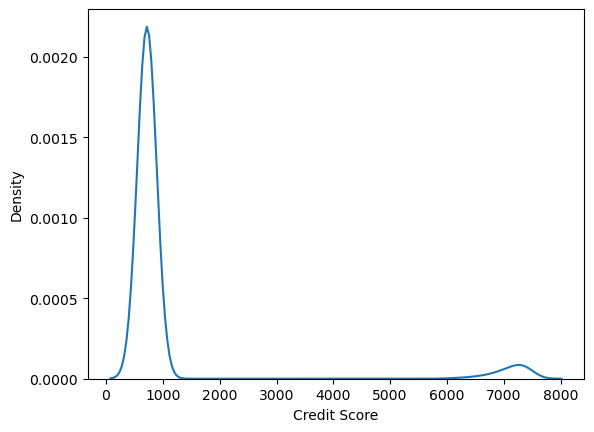

In [23]:
sns.kdeplot(df_train['Credit Score'])

<Axes: xlabel='Annual Income', ylabel='Density'>

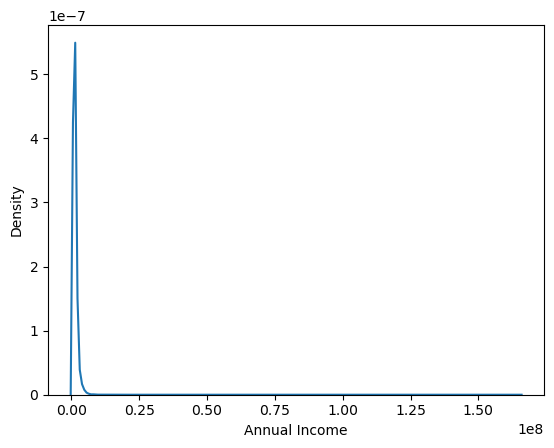

In [24]:
sns.kdeplot(df_train['Annual Income'])

In [25]:
df_numerical = df_train.select_dtypes(include = ['float64'])

In [26]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

imputer = IterativeImputer()
imputed = imputer.fit_transform(df_numerical)
df_imputed = pd.DataFrame(imputed, columns=df_numerical.columns)
df_train['Credit Score'] = df_imputed['Credit Score']
df_train['Annual Income']= df_imputed['Annual Income']

In [27]:
df_train.isnull().sum()/df_train.shape[0]*100

Loan ID                          0.000000
Customer ID                      0.000000
Loan Status                      0.000000
Current Loan Amount              0.000000
Term                             0.000000
Credit Score                     9.354525
Annual Income                    9.354525
Years in current job             0.000000
Home Ownership                   0.000000
Purpose                          0.000000
Monthly Debt                     0.000000
Years of Credit History          0.000000
Months since last delinquent    53.950643
Number of Open Accounts          0.000000
Number of Credit Problems        0.000000
Current Credit Balance           0.000000
Maximum Open Credit              0.000000
Bankruptcies                     0.000000
Tax Liens                        0.000000
dtype: float64

<Axes: >

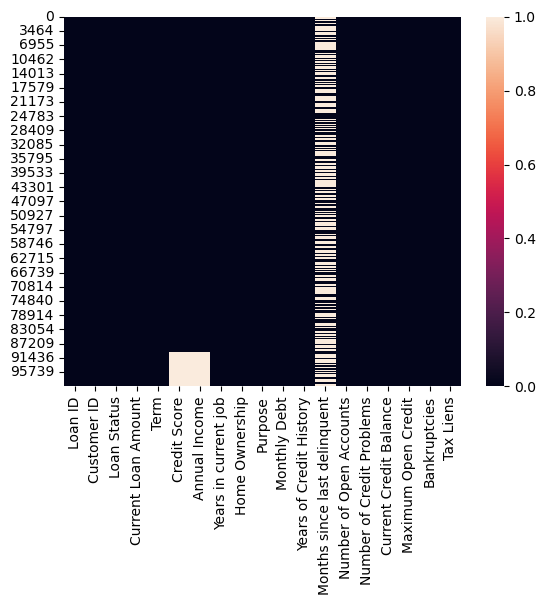

In [28]:
sns.heatmap(df_train.isnull())

In [29]:
df_train['Credit Score']= df_train['Credit Score'].interpolate()

In [30]:
df_train['Annual Income']= df_train['Annual Income'].interpolate()

<Axes: xlabel='Credit Score', ylabel='Density'>

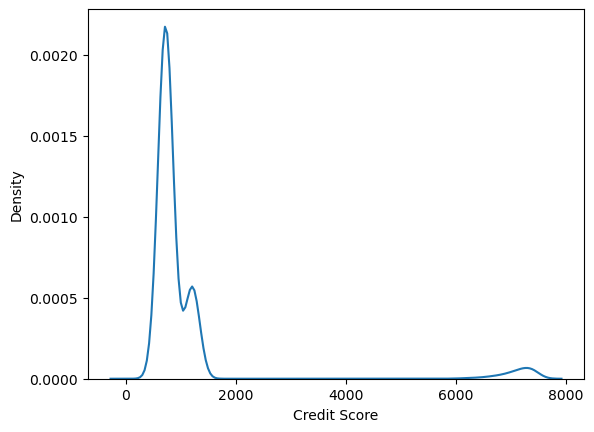

In [31]:
sns.kdeplot(df_train['Credit Score'])

<Axes: xlabel='Annual Income', ylabel='Density'>

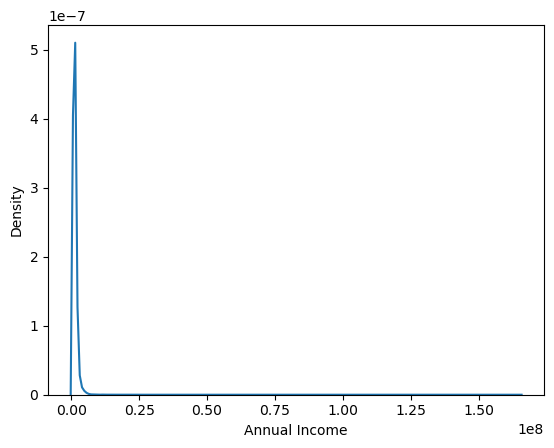

In [32]:
sns.kdeplot(df_train['Annual Income'])

In [33]:
df_train.isnull().sum()/df_train.shape[0]*100

Loan ID                          0.000000
Customer ID                      0.000000
Loan Status                      0.000000
Current Loan Amount              0.000000
Term                             0.000000
Credit Score                     0.000000
Annual Income                    0.000000
Years in current job             0.000000
Home Ownership                   0.000000
Purpose                          0.000000
Monthly Debt                     0.000000
Years of Credit History          0.000000
Months since last delinquent    53.950643
Number of Open Accounts          0.000000
Number of Credit Problems        0.000000
Current Credit Balance           0.000000
Maximum Open Credit              0.000000
Bankruptcies                     0.000000
Tax Liens                        0.000000
dtype: float64

In [34]:
fill_list= df_train[df_train['Months since last delinquent'].isnull()==False]
fill_list= fill_list['Months since last delinquent']
fill_list

1         8.0
2        29.0
6        10.0
7         8.0
8        33.0
         ... 
99985    21.0
99990    16.0
99994    18.0
99996    21.0
99997    18.0
Name: Months since last delinquent, Length: 41257, dtype: float64

<Axes: xlabel='Months since last delinquent', ylabel='Density'>

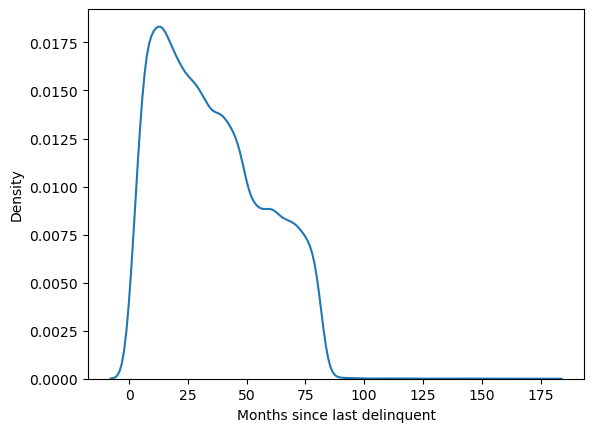

In [35]:
sns.kdeplot(df_train['Months since last delinquent'])

In [36]:
df_train['Months since last delinquent'] = df_train['Months since last delinquent'].fillna(pd.Series(np.random.choice(fill_list , size = len(df_train.index))))

In [37]:
df_train.isnull().sum()/df_train.shape[0]*100

Loan ID                         0.000000
Customer ID                     0.000000
Loan Status                     0.000000
Current Loan Amount             0.000000
Term                            0.000000
Credit Score                    0.000000
Annual Income                   0.000000
Years in current job            0.000000
Home Ownership                  0.000000
Purpose                         0.000000
Monthly Debt                    0.000000
Years of Credit History         0.000000
Months since last delinquent    5.108658
Number of Open Accounts         0.000000
Number of Credit Problems       0.000000
Current Credit Balance          0.000000
Maximum Open Credit             0.000000
Bankruptcies                    0.000000
Tax Liens                       0.000000
dtype: float64

<Axes: >

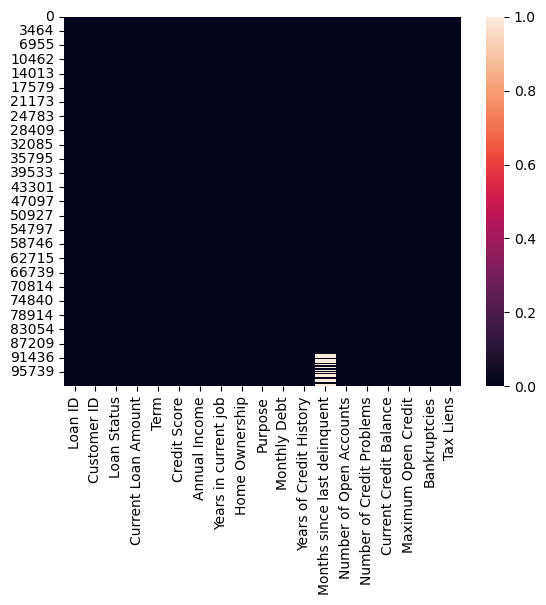

In [38]:
sns.heatmap(df_train.isnull())

In [39]:
df_train['Months since last delinquent']= df_train['Months since last delinquent'].interpolate()

In [40]:
df_train.isnull().sum()/df_train.shape[0]*100

Loan ID                         0.0
Customer ID                     0.0
Loan Status                     0.0
Current Loan Amount             0.0
Term                            0.0
Credit Score                    0.0
Annual Income                   0.0
Years in current job            0.0
Home Ownership                  0.0
Purpose                         0.0
Monthly Debt                    0.0
Years of Credit History         0.0
Months since last delinquent    0.0
Number of Open Accounts         0.0
Number of Credit Problems       0.0
Current Credit Balance          0.0
Maximum Open Credit             0.0
Bankruptcies                    0.0
Tax Liens                       0.0
dtype: float64

<Axes: xlabel='Months since last delinquent', ylabel='Density'>

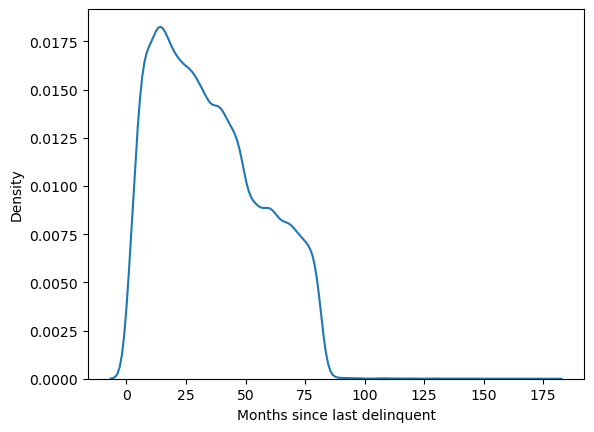

In [41]:
sns.kdeplot(df_train['Months since last delinquent'])

In [42]:
df_numerical.shape

(89593, 12)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



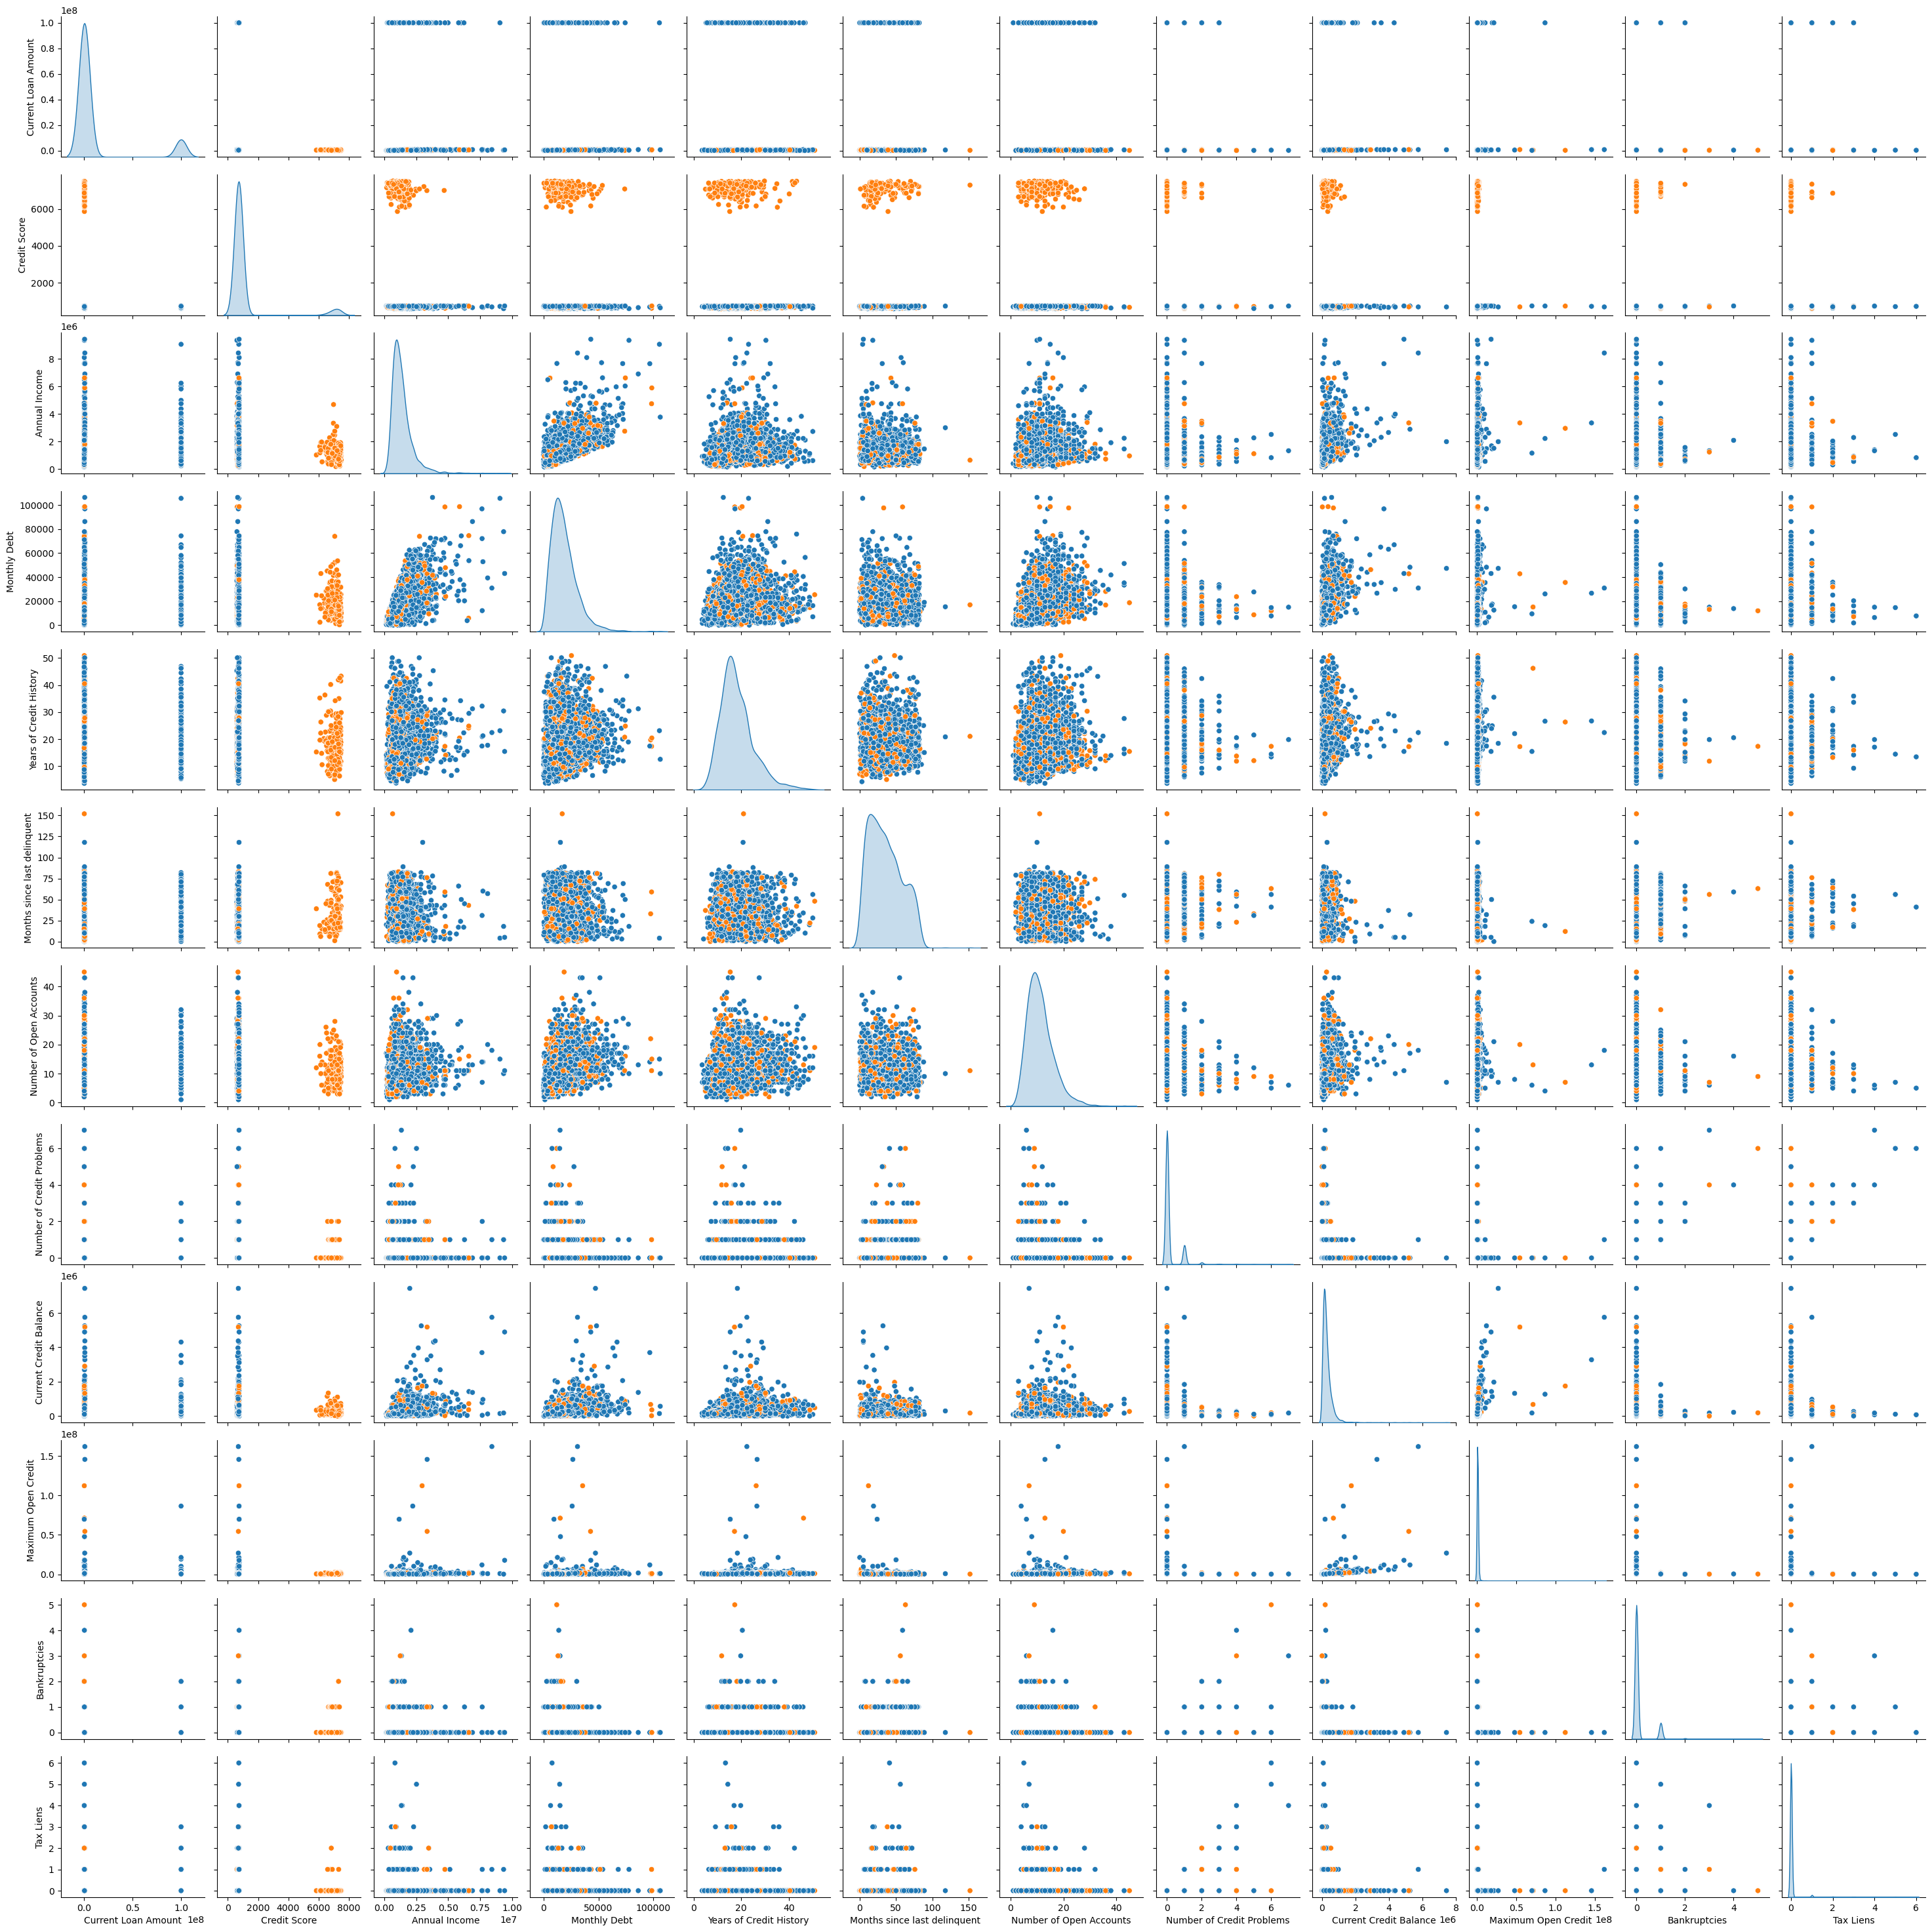

In [43]:
sns.pairplot(df_numerical.iloc[:5000,:], diag_kind='kde', plot_kws={'hue': df_train['Loan Status']})

In [44]:
df_train.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [45]:
df_train.drop(['Loan ID','Customer ID'],axis=1, inplace = True)

In [46]:
from sklearn import preprocessing
  
df_categorical = df_train.select_dtypes(include='object')
label_encoder = preprocessing.LabelEncoder()
for column in df_categorical.columns:
    df_train[column]= label_encoder.fit_transform(df_train[column])

In [47]:
df_numerical.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens'],
      dtype='object')

Current Loan Amount                Axes(0.125,0.712609;0.168478x0.167391)
Credit Score                    Axes(0.327174,0.712609;0.168478x0.167391)
Annual Income                   Axes(0.529348,0.712609;0.168478x0.167391)
Monthly Debt                    Axes(0.731522,0.712609;0.168478x0.167391)
Years of Credit History            Axes(0.125,0.511739;0.168478x0.167391)
Months since last delinquent    Axes(0.327174,0.511739;0.168478x0.167391)
Number of Open Accounts         Axes(0.529348,0.511739;0.168478x0.167391)
Number of Credit Problems       Axes(0.731522,0.511739;0.168478x0.167391)
Current Credit Balance              Axes(0.125,0.31087;0.168478x0.167391)
Maximum Open Credit              Axes(0.327174,0.31087;0.168478x0.167391)
Bankruptcies                     Axes(0.529348,0.31087;0.168478x0.167391)
Tax Liens                        Axes(0.731522,0.31087;0.168478x0.167391)
dtype: object

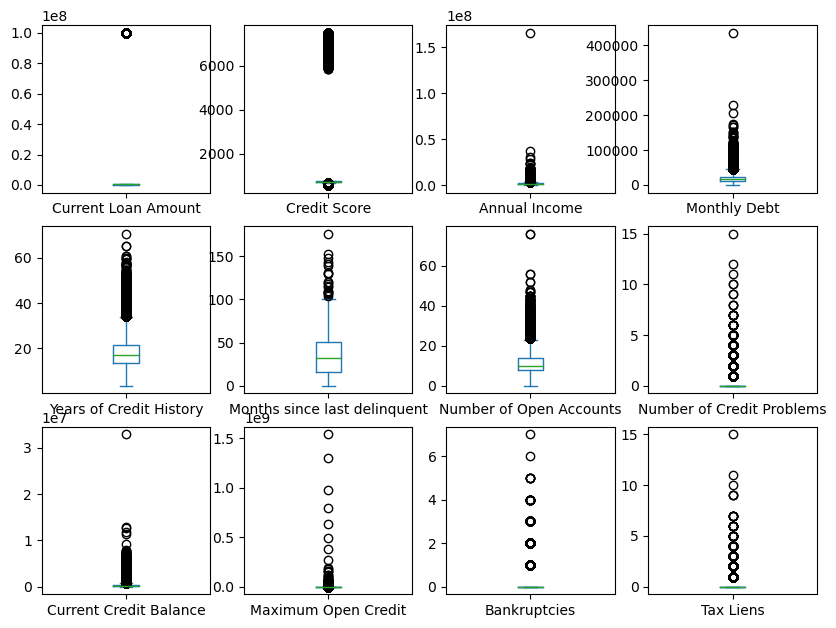

In [48]:
df_numerical.plot(kind = "box" , subplots = True , figsize = (10,10) , layout = (4,4))

## Model 

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x = df_train.drop(["Loan Status"] , axis = 1).values
y = df_train["Loan Status"].values

In [51]:
x_train , x_test , y_train ,y_test = train_test_split(x,y , test_size= 0.25 , random_state= 42)

In [52]:
all_accuracies = []

## Logistic Regression

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [54]:
logreg_model = LogisticRegression()

logreg_model.fit(X_train_scaled, y_train)

y_pred = logreg_model.predict(X_test_scaled)

accuracy_score(y_test, y_pred)

0.7495870351354971

In [55]:
all_accuracies.append(accuracy_score(y_test, y_pred))

In [56]:
report= classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.00      0.01      5612
           1       0.75      1.00      0.86     16787

    accuracy                           0.75     22399
   macro avg       0.65      0.50      0.43     22399
weighted avg       0.70      0.75      0.64     22399



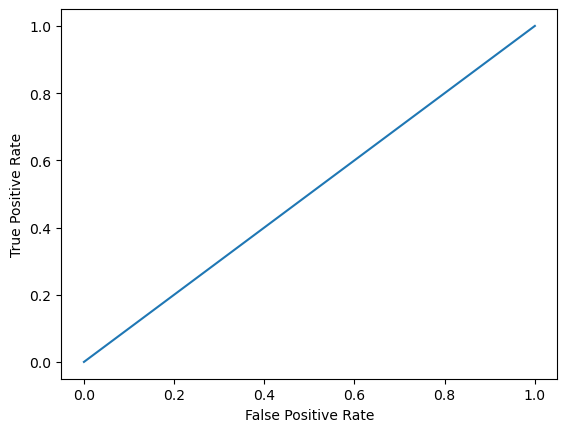

In [57]:
from sklearn import metrics
y_pred_proba = logreg_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

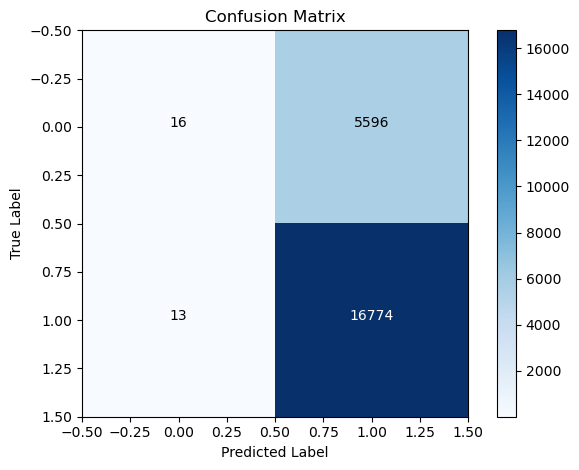

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

## Regularized Logistic Regression (L1 and l2)

**L1**

In [59]:
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear')
logreg_l1.fit(X_train_scaled, y_train)
y_pred_l1 = logreg_l1.predict(X_test_scaled)
accuracy_score(y_test, y_pred_l1)

0.7495870351354971

In [60]:
all_accuracies.append(accuracy_score(y_test, y_pred_l1))

In [61]:
report_l1 = classification_report(y_test, y_pred_l1)
print("Classification Report:\n", report_l1)

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.00      0.01      5612
           1       0.75      1.00      0.86     16787

    accuracy                           0.75     22399
   macro avg       0.65      0.50      0.43     22399
weighted avg       0.70      0.75      0.64     22399



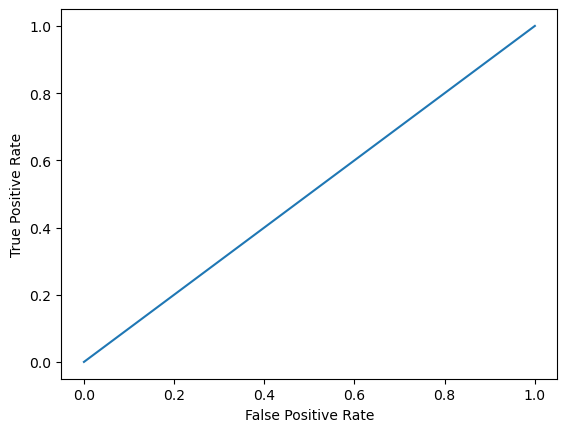

In [62]:
from sklearn import metrics
y_pred_proba = logreg_l1.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

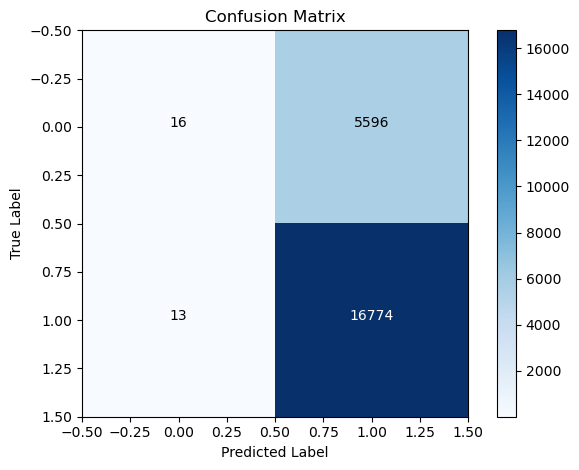

In [63]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

**L2**

In [64]:
logreg_l2 = LogisticRegression(penalty='l2')
logreg_l2.fit(X_train_scaled, y_train)
y_pred_l2 = logreg_l2.predict(X_test_scaled)
accuracy_score(y_test, y_pred_l2)

0.7495870351354971

In [65]:
all_accuracies.append(accuracy_score(y_test, y_pred_l2))

In [66]:
report_l2 = classification_report(y_test, y_pred_l2)
print("Classification Report:\n", report_l2)

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.00      0.01      5612
           1       0.75      1.00      0.86     16787

    accuracy                           0.75     22399
   macro avg       0.65      0.50      0.43     22399
weighted avg       0.70      0.75      0.64     22399



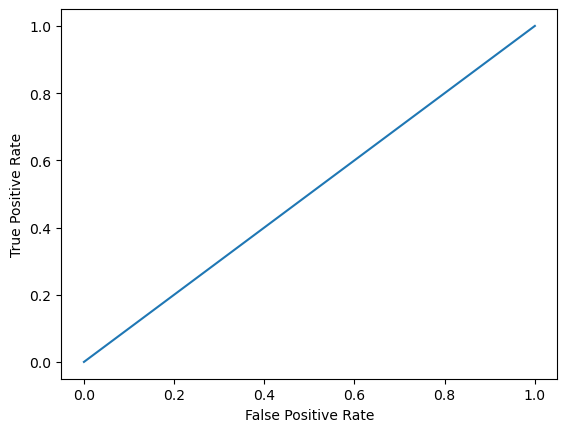

In [67]:
from sklearn import metrics
y_pred_proba = logreg_l2.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

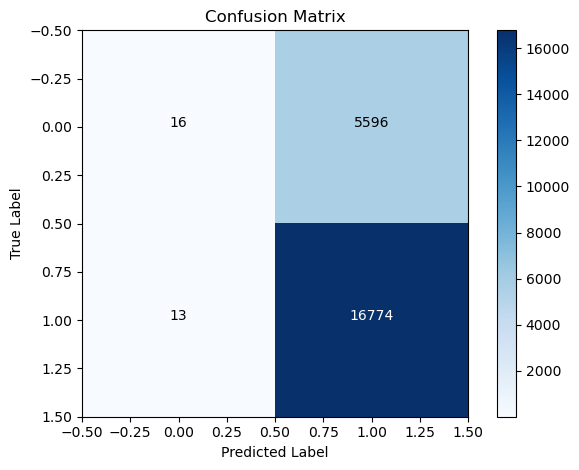

In [68]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

## Naiive Bayes

In [69]:
from sklearn.naive_bayes import GaussianNB

In [70]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)
y_pred = nb_classifier.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.38434751551408547

In [71]:
all_accuracies.append(accuracy_score(y_test, y_pred))

In [72]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.99      0.45      5612
           1       0.98      0.18      0.31     16787

    accuracy                           0.38     22399
   macro avg       0.64      0.59      0.38     22399
weighted avg       0.81      0.38      0.34     22399



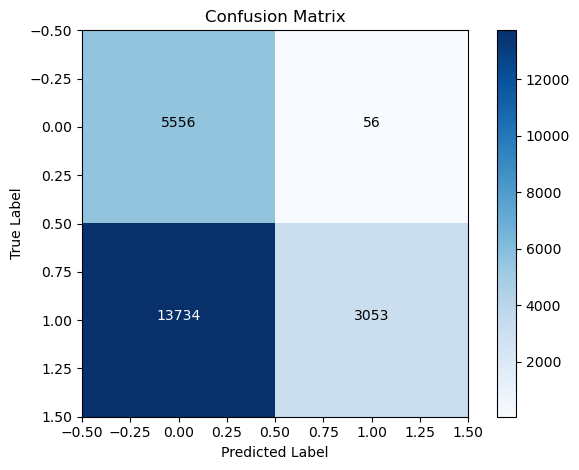

In [73]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

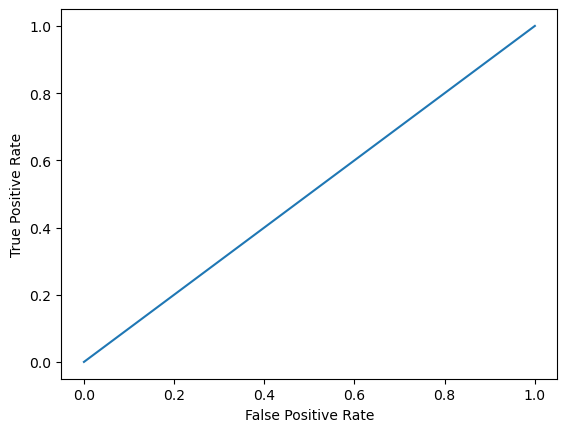

In [74]:
from sklearn import metrics
y_pred_proba = nb_classifier.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## SVM

In [75]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC

In [76]:
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)

y_pred = svm_classifier.predict(X_test_scaled)

accuracy_score(y_test, y_pred)

0.7498549042367962

In [77]:
all_accuracies.append(accuracy_score(y_test, y_pred))

In [78]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.01      0.01      5612
           1       0.75      1.00      0.86     16787

    accuracy                           0.75     22399
   macro avg       0.67      0.50      0.43     22399
weighted avg       0.71      0.75      0.64     22399



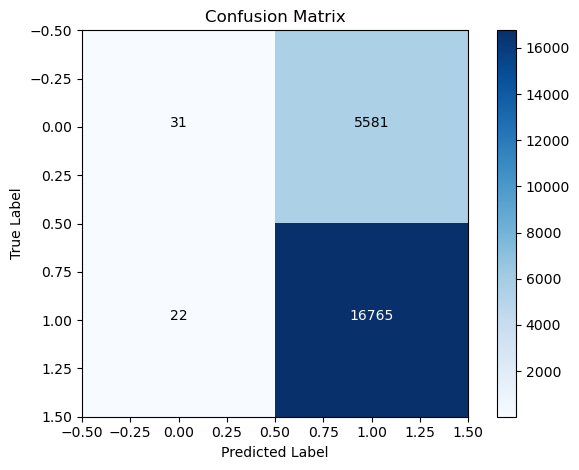

In [79]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

## KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
train_accuracies = []
test_accuracies = []

for n_neighbors in range(1, 11):
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_classifier.fit(X_train_scaled, y_train)
    
    y_train_pred = knn_classifier.predict(X_train_scaled)
    y_test_pred = knn_classifier.predict(X_test_scaled)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

In [82]:
len(train_accuracies)

10

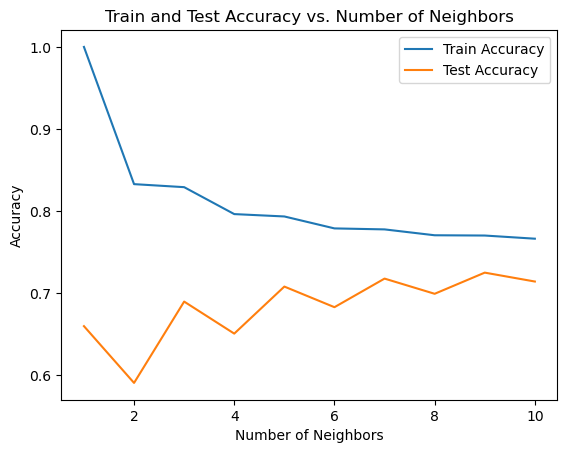

In [83]:
plt.plot((range(1, 11)), train_accuracies, label='Train Accuracy')
plt.plot((range(1, 11)), test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. Number of Neighbors')
plt.legend()
plt.show()

In [84]:
knn_classifier = KNeighborsClassifier()

param_dist = {
    'n_neighbors': range(1, 11)
}
random_search = RandomizedSearchCV(estimator=knn_classifier, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_train_scaled, y_train)

best_params = random_search.best_params_
best_knn = random_search.best_estimator_

y_pred = best_knn.predict(X_test_scaled)

accuracy_score(y_test, y_pred)

0.7247198535648913

In [85]:
all_accuracies.append(accuracy_score(y_test, y_pred))

In [86]:
best_params

{'n_neighbors': 9}

In [87]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.14      0.21      5612
           1       0.76      0.92      0.83     16787

    accuracy                           0.72     22399
   macro avg       0.57      0.53      0.52     22399
weighted avg       0.66      0.72      0.68     22399



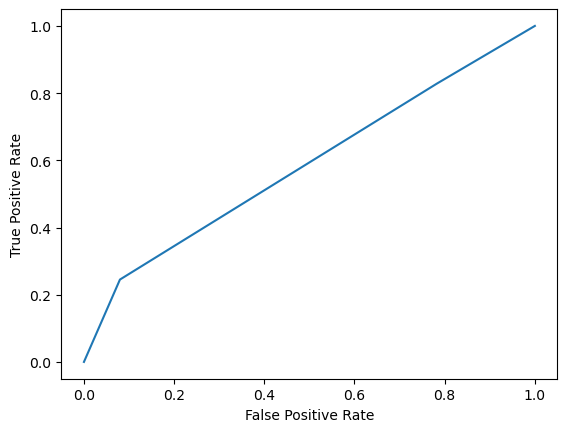

In [88]:
from sklearn import metrics
y_pred_proba = random_search.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

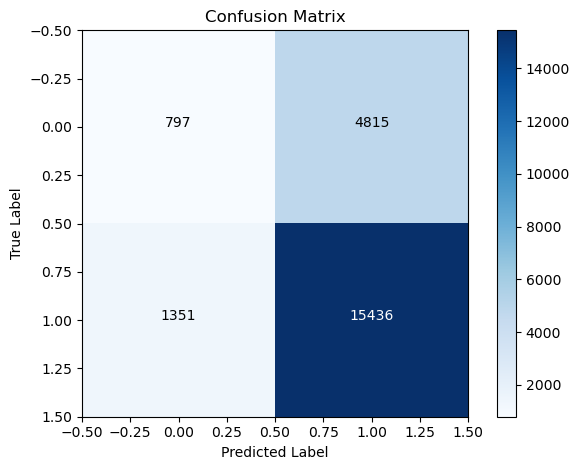

In [89]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

## Comparison

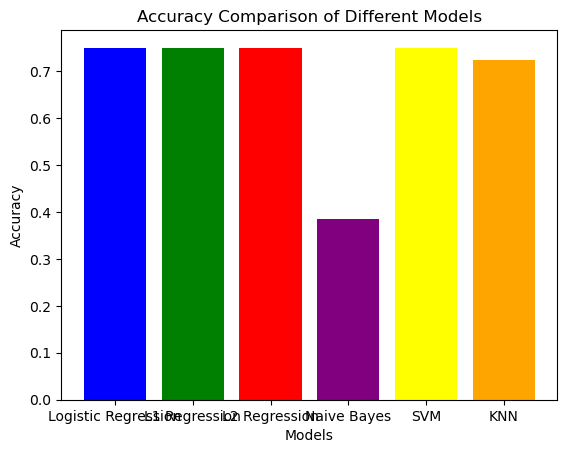

In [90]:
model_names = ['Logistic Regression', 'L1 Regression', 'L2 Regression', 'Naive Bayes','SVM', 'KNN']


plt.bar(model_names,all_accuracies ,color=['blue', 'green', 'red', 'purple','yellow', 'orange'])

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.show()
